

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Entrega 2- Segmentación, extracción de características y análisis PCA </p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA Y ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="../figs/Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>23 de mayo de 2022</p>

## Contenido



In [44]:
# Librerías necesarias
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import stats as st
from scipy.cluster import vq


## Segmentación

In [45]:
# Importación de monilia
n_imag_monilia=10
imag_monilia=[]
listaImagenesProcesadas=np.array([])

for i in range(n_imag_monilia):
    listaImagenesProcesadas=np.append(listaImagenesProcesadas,'monilia')
    imag_monilia_aux = cv2.imread(f'../figs/imagenesSegmentadasManualmente/Monilia/Monilia{i+1}.jpg')
    imag_monilia.append(cv2.cvtColor(imag_monilia_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(10, 10))
# for i in range(n_imag_monilia):
#     plt.subplot(3,10,i+1),plt.imshow(imag_monilia[i])
#     plt.xticks([]),plt.yticks([])



Phytophthora import

In [46]:
n_imag_fito=10
imag_fito=[]


    

for i in range(n_imag_fito):
    listaImagenesProcesadas=np.append(listaImagenesProcesadas,'fito')
    imag_fito_aux = cv2.imread(f'../figs/imagenesSegmentadasManualmente/Fito/Fito{i+1}.jpg')
    imag_fito.append(cv2.cvtColor(imag_fito_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(30, 30))
# for i in range(n_imag_fito):
  
#     plt.subplot(3,10,i+1),plt.imshow(imag_fito[i])
#     plt.xticks([]),plt.yticks([])



In [47]:
# Importación de cacao saludable

n_imag_healty=10
imag_healty=[]


for i in range(n_imag_healty):
    listaImagenesProcesadas=np.append(listaImagenesProcesadas,'saludable')
    imag_healty_aux = cv2.imread(f'../figs/imagenesSegmentadasManualmente/Sana/Sana{i+1}.jpg')
    imag_healty.append(cv2.cvtColor(imag_healty_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(10, 10))
# for i in range(n_imag_healty):
#     plt.subplot(3,10,i+1),plt.imshow(imag_healty[i])
#     plt.xticks([]),plt.yticks([])
listaImagenesProcesadas

array(['monilia', 'monilia', 'monilia', 'monilia', 'monilia', 'monilia',
       'monilia', 'monilia', 'monilia', 'monilia', 'fito', 'fito', 'fito',
       'fito', 'fito', 'fito', 'fito', 'fito', 'fito', 'fito',
       'saludable', 'saludable', 'saludable', 'saludable', 'saludable',
       'saludable', 'saludable', 'saludable', 'saludable', 'saludable'],
      dtype='<U32')

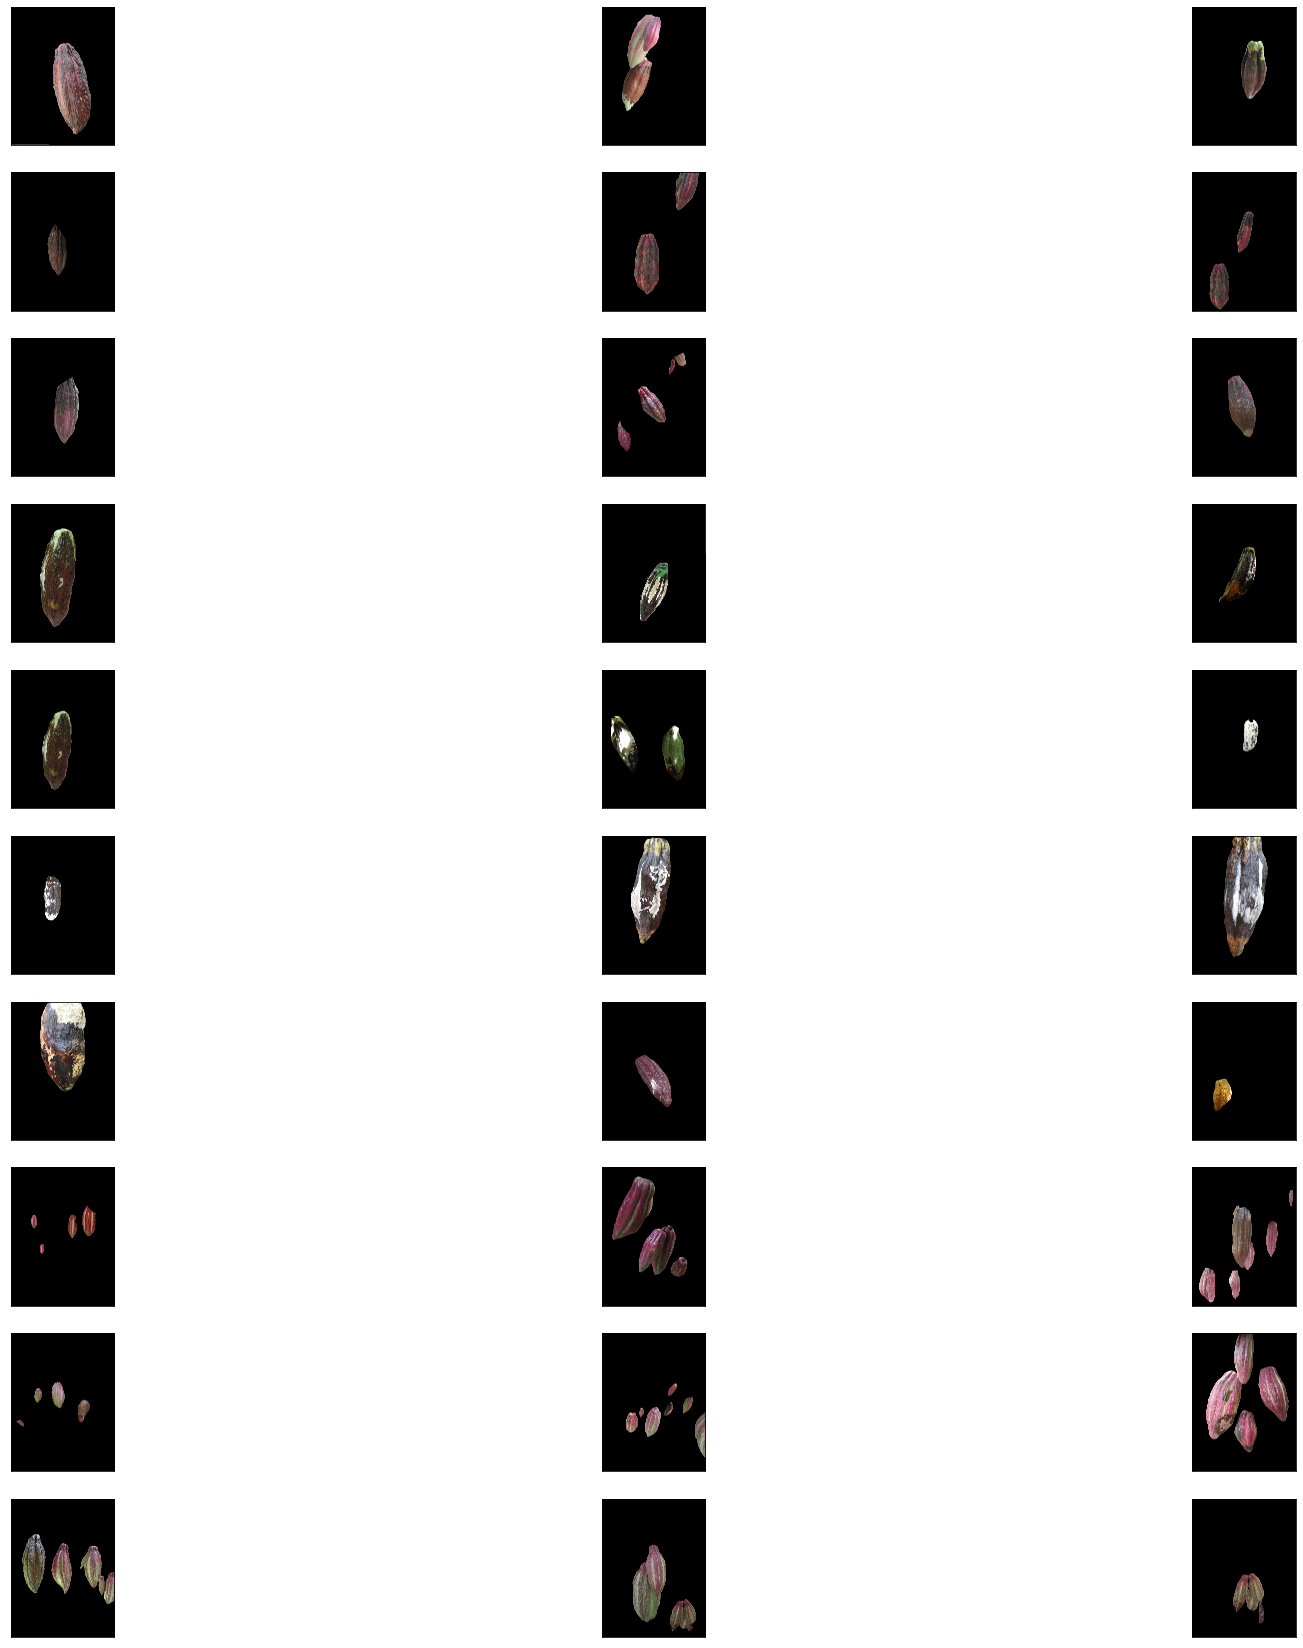

In [48]:
## Se unen todas las imágenes y se haca un redimensionamiento
imagenes = imag_fito+imag_monilia+imag_healty
                                

plt.figure(figsize=(30, 30))
for i in range(len(imagenes)):
    plt.subplot(math.ceil(len(imagenes)/3),3,i+1),plt.imshow(imagenes[i])
    plt.xticks([]),plt.yticks([])

plt.show()


<Figure size 2160x2160 with 0 Axes>

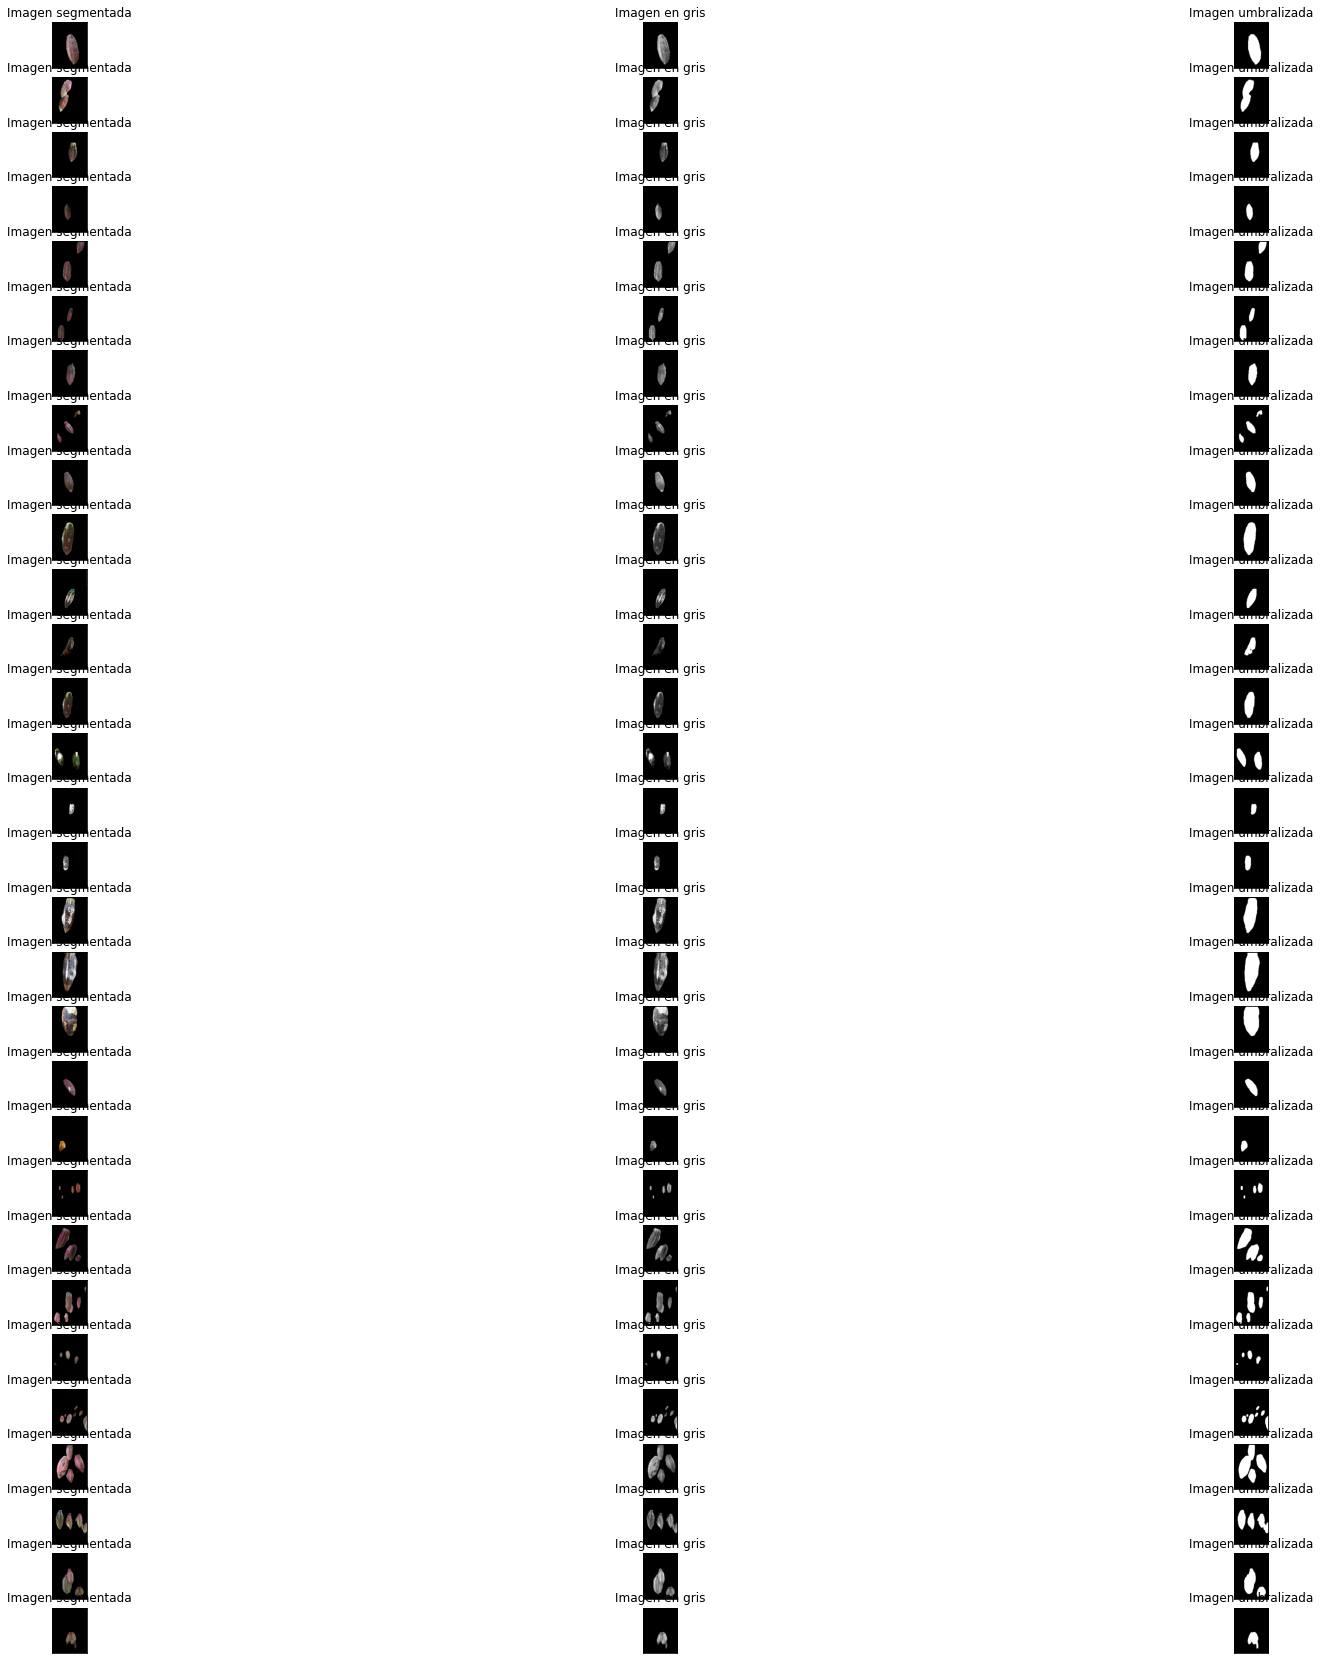

In [49]:
## Preprocesamiento

def posMax(Vector):
    ''' 
    Calcula la posición del máximo componete del Vector
    Vector: nx1 vector para hallar el máximo
    '''
    return np.where(Vector == np.amax(Vector))[0][0]


plt.figure(figsize=(30, 30))

elemento_rectangular = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
kernel=elemento_rectangular


image_blur = []
img_gray_blur = []
contours=[]
img_threshold=[]
img_threshold_morphFilter=[]
img_threshold_morphFilter_erosion=[]
img_threshold_morphFilter_erosion_dilatacion=[]
img_contornos_polylines=[]
img_contornos_drawContours=[]
cnt = []
minSize=256

for i in range(len(imagenes)):
    
    # Reducción de Escala

    n=imagenes[i].shape[0]
    m=imagenes[i].shape[1]
    

    escala= minSize/min(n,m)
    imagenes[i]= cv2.resize(imagenes[i], None, fx=escala, fy= escala,\
                                interpolation= cv2.INTER_LINEAR)
    
    # Filtro GaussianBlur
    image_blur.append(cv2.GaussianBlur(imagenes[i],(5,5),0))

    # Conversión a escala de grises
    img_gray_blur.append(cv2.cvtColor(image_blur[i], cv2.COLOR_RGB2GRAY)) 

    # Umbralización 'adaptativa' con THRESH_OTSU
    # img_thr_THRESH_OTSU= cv2.threshold(img_gray_blur[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    # Umbralización con threshold
    img_thr_threshold= cv2.threshold(img_gray_blur[i],10,255,0)[1]
    
    img_threshold.append(img_thr_threshold)

    # Filtrado morfológico
    opening = cv2.morphologyEx(img_threshold[i],cv2.MORPH_OPEN,kernel, iterations = 1)
    closing= cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 1)

    img_threshold_morphFilter.append(closing)

    # Erosiones
    n_erosiones=math.ceil((math.log(img_gray_blur[i].shape[0]*img_gray_blur[i].shape[1]))/3)
    img_threshold_morphFilter_erosion.append(\
        cv2.erode(img_threshold_morphFilter[i],kernel,iterations = n_erosiones))

    # Dilataciones
    n_dilataciones=n_erosiones
    img_threshold_morphFilter_erosion_dilatacion.append(cv2.dilate(img_threshold_morphFilter_erosion[i],kernel,\
    iterations = n_dilataciones))


    # Se hallan los contornos [2]
    contours.append(cv2.findContours(\
        img_threshold_morphFilter_erosion_dilatacion[i],cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[0])
    
    areas=np.array([],float)


    for contorno in contours[i]:        
            areas=np.append(areas,cv2.contourArea(contorno))

    posicionMaximaArea=posMax(areas)

    cnt.append(contours[i][posicionMaximaArea]) 
    
    
    img_contornos_polylines.append(imagenes[i].copy())
    img_contornos_drawContours.append(imagenes[i].copy())

    #Dibuja contornos [2]
    cv2.polylines(img_contornos_polylines[i], contours[i], 1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

    cv2.drawContours(img_contornos_drawContours[i], contours=contours[i],\
        contourIdx=-1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

plt.figure(figsize=(30, 30))
contador=0
for i in range(0,len(imagenes)*3,3):
    plt.subplot(len(imagenes),3,i+1),plt.imshow(imagenes[contador])
    plt.title('Imagen segmentada'),plt.xticks([]),plt.yticks([])

    plt.subplot(len(imagenes),3,i+2),plt.imshow(img_gray_blur[contador],cmap=plt.cm.gray)
    plt.title('Imagen en gris'),plt.xticks([]),plt.yticks([])

    plt.subplot(len(imagenes),3,i+3),plt.imshow(img_threshold_morphFilter_erosion_dilatacion[contador],cmap=plt.cm.gray)
    plt.title('Imagen umbralizada'),plt.xticks([]),plt.yticks([])

    contador+=1
contador=0
plt.show()


3 Contornos

In [50]:
# Se dibujan los contornos
n_total=len(imagenes)

# plt.figure(figsize=(30, 30))
# for i in range(0,n_total*2,2):
#     plt.subplot(n_total,2,i+1),plt.imshow(img_contornos_drawContours[contador])
#     plt.title('Contornos drawContours'), plt.xticks([]), plt.yticks([])
    
#     plt.subplot(n_total,2,i+2),plt.imshow(img_contornos_polylines[contador])
#     plt.title('Contornos con polylines'), plt.xticks([]), plt.yticks([])
    
#     contador+=1

# contador=0
# plt.show()




## Extracción de características

In [51]:
n_imagenes=n_total
n_caracteristicas=1 # Registra el número total de características

caracteristicas=[] # Caracerísticas de las n imágenes
momentos = []


for j in range(n_imagenes):

    # Eliminación de partes que no pertenecen al contorno

    n=imagenes[j].shape[0]
    m=imagenes[j].shape[1]
    c=imagenes[j].shape[2]


    # Extracción de RGB
    aux_imagenes=imagenes[j].copy()

    imagenes_R=aux_imagenes[:,:,0]
    imagenes_G=aux_imagenes[:,:,1]
    imagenes_B=aux_imagenes[:,:,2]

    # Se pone en una sola columna la matriz nxm
    imagenes_R.shape=(n*m)
    imagenes_G.shape=(n*m)
    imagenes_B.shape=(n*m)

    img_threshold_morphFilter_erosion_dilatacion[j].shape=(n*m)

    # Se colocan como cero los pixeles que no están en umbralización

    for i in range(n*m):
        if img_threshold_morphFilter_erosion_dilatacion[j][i]==0:
            imagenes_R[i]=0
            imagenes_G[i]=0
            imagenes_B[i]=0

    # Se reajusta el tamaño original
    imagenes_R.shape=(n,m)
    imagenes_G.shape=(n,m)
    imagenes_B.shape=(n,m)
    img_threshold_morphFilter_erosion_dilatacion[j].shape=(n,m)

    # Se arma la nueva imagenesn
    new_imagenes=imagenes[j].copy()
    new_imagenes[:,:,0]=imagenes_R
    new_imagenes[:,:,1]=imagenes_G
    new_imagenes[:,:,2]=imagenes_B

    new_imagenes_gray=cv2.cvtColor(new_imagenes, cv2.COLOR_RGB2GRAY)
   


    
    n=new_imagenes.shape[0]
    m=new_imagenes.shape[1]
    c=new_imagenes.shape[2]


    # Extracción de RGB
    aux_imagenes=new_imagenes.copy()
    aux_new_imagenes_gray=new_imagenes_gray.copy()

    imagenes_R=aux_imagenes[:,:,0]
    imagenes_G=aux_imagenes[:,:,1]
    imagenes_B=aux_imagenes[:,:,2]

    # Se pone en una sola columna la matriz nxm
    imagenes_R.shape=(n*m)
    imagenes_G.shape=(n*m)
    imagenes_B.shape=(n*m)
    aux_new_imagenes_gray.shape=(n*m)

    # print(f'Vector R inicial {imagenes_R.shape}')
    # print(f'Vector G inicial {imagenes_G.shape}')
    # print(f'Vector B inicial {imagenes_B.shape}')
    # print(f'Vector gris inicial {aux_new_imagenes_gray.shape}')

    imagenes_R_sinNegro=[]
    imagenes_G_sinNegro=[]
    imagenes_B_sinNegro=[]
    new_imagenes_gray_sinNegro=[]

    # Se colocan como cero los pixeles que no están en umbralización

    for i in range(n*m):
        if imagenes_R[i]!=0:
            imagenes_R_sinNegro.append(imagenes_R[i])
        if imagenes_G[i]!=0:
            imagenes_G_sinNegro.append(imagenes_G[i])
        if imagenes_B[i]!=0:
            imagenes_B_sinNegro.append(imagenes_B[i])
        
        if aux_new_imagenes_gray[i]!=0:
            new_imagenes_gray_sinNegro.append(aux_new_imagenes_gray[i])
        

    # print(f'Vector R final {len(imagenes_R_sinNegro)}')
    # print(f'Vector G final {len(imagenes_G_sinNegro)}')
    # print(f'Vector B final {len(imagenes_B_sinNegro)}')
    # print(f'Vector gris final {len(new_imagenes_gray_sinNegro)}')

    # Se reinicia el vector de características de cada imagen
    aux_caracteristicas=[]

    # Extracción de moda en RGB y grises
    aux_caracteristicas.append(st.mode(imagenes_R_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(imagenes_G_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(imagenes_B_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(new_imagenes_gray_sinNegro)[0][0])


    # Extracción de media en RGB y grises
    aux_caracteristicas.append(np.mean(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.mean(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.mean(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.mean(new_imagenes_gray_sinNegro))



    # Extracción de mínimo en RGB y grises
    aux_caracteristicas.append(np.amin(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.amin(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.amin(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.amin(new_imagenes_gray_sinNegro))

    # Extracción de máximo en RGB y grises
    aux_caracteristicas.append(np.amax(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.amax(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.amax(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.amax(new_imagenes_gray_sinNegro))

    #Momentos
    momentos.append(cv2.moments(cnt[j]))

    #MomentosHU
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[0][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[1][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[2][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[3][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[4][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[5][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[6][0])
    

    # Redondez [1]
    try:
        aux_caracteristicas.append((4*math.pi*cv2.contourArea(cnt[j]))/(cv2.arcLength(cnt[j],True))**2)
    except ZeroDivisionError:
        aux_caracteristicas.append(0)


    # Relación entre Eje mayor y menor
    

    # Se va aumentando el vector de características totales
    caracteristicas+=aux_caracteristicas

# Se contabilizan el númeto de características    
n_caracteristicas=len(aux_caracteristicas)
aux_caracteristicas=[]
# Se convierte de lista a array 
caracteristicas=np.array(caracteristicas)


# Se convierte el array a tamaño n_imagenesxn_caracteristicas 
caracteristicas.shape=(n_imagenes,n_caracteristicas)
print(f'Forma características: {caracteristicas.shape}')

Forma características: (30, 24)


### Estandarización

El docente Daniel Vargas Medina recomendó realizar la estandarización de la siguiente forma:  

$$ 
X_{new}= \frac{X - X_{min}}{ X_{max} - X_{min} }
$$

Estos son los límites de las características que se elegieron:

* Moda y media: [0, 255] dado que cada pixel se representa mediante 8 bits.
* Valor mínimo: [0,255]
* Valor máximo: [0,255]
* Momentos de Hu: [min,max]
* redondez= [0,1]

El min corresponde al valor mínimo de dicha característica en todo el conjunto de datos y el valor máximo es análogo.

In [52]:
# Estandarización 

## Atributos de las características [nombre,lim inferior,lim superior]


atributos_caracteristicas=np.array([
['Moda R',0,255],
['Moda G',0,255],
['Moda B',0,255],
['Moda Gris',0,255],
['Media R',0,255],
['Media G',0,255],
['Media B',0,255],
['Media Gris',0,255],
['mínimo R',0,255],
['mínimo G',0,255],
['mínimo B',0,255],
['mínimo Gris',0,255],
['máximo R',0,255],
['máximo G',0,255],
['máximo B',0,255],
['máximo Gris',0,255],
['Momento HU 1',np.amin(caracteristicas[:,16]),np.amax(caracteristicas[:,16])],
['Momento HU 2',np.amin(caracteristicas[:,17]),np.amax(caracteristicas[:,17])],
['Momento HU 3',np.amin(caracteristicas[:,18]),np.amax(caracteristicas[:,18])],
['Momento HU 4',np.amin(caracteristicas[:,19]),np.amax(caracteristicas[:,19])],
['Momento HU 5',np.amin(caracteristicas[:,20]),np.amax(caracteristicas[:,20])],
['Momento HU 6',np.amin(caracteristicas[:,21]),np.amax(caracteristicas[:,21])], 
['Momento HU 7',np.amin(caracteristicas[:,22]),np.amax(caracteristicas[:,22])],
['Redondez',0,1]
])


Xl_min=np.float64(atributos_caracteristicas[:,1].T)
Xl_max=np.float64(atributos_caracteristicas[:,2].T)
nombre_caracteristicas=atributos_caracteristicas[:,0].T

# Se aplica la estandarización
caracteristicasEstandarizadas=np.zeros(caracteristicas.shape)
for i in range(n_imagenes):
    caracteristicasEstandarizadas[i]=(caracteristicas[i]-Xl_min)/(Xl_max-Xl_min)

#caracteristicasEstandarizadas
print(f'forma características normalizadas: {caracteristicasEstandarizadas.shape}')


forma características normalizadas: (30, 24)


## Análisis PCA



In [53]:
def eliminacionColumna(Matriz,nEliminar):
    '''
    Elimina la columna  nEliminar de un Matriz
    '''
    try:
        return np.delete(Matriz, nEliminar, 1)
    except np.AxisError: 
        return np.delete(Matriz, nEliminar, -1)


def posMax(Vector):
    ''' 
    Posición del máximo valor de un vector
    Envía la primera posición del máximo
    '''
    return np.where(Vector == np.amax(Vector))[0][0]


def auxUltimaPosicionMayorComponenteVectoresPropios(posicionCaractaristicas,posicionCaractaristicasMayorCompoenteVectorPropio,eigVec,posEigVec,n_caracteristicas):
    

    if len(posicionCaractaristicasMayorCompoenteVectorPropio)!=0:

        # Se eliminan las columnas del vector de posición que ya han tenido el mayor
        # Componente de los vectores propios
        # print(posicionCaractaristicasMayorCompoenteVectorPropio)
        PosicionCaractaristicasEvaluar=eliminacionColumna(posicionCaractaristicas,posicionCaractaristicasMayorCompoenteVectorPropio) 

    else:
        PosicionCaractaristicasEvaluar=posicionCaractaristicas

    # Es el condicional para tenerminar la función recursiva
    # evalua que se hayan analizado n-1 posiciones de los vectores propios
    if (len(posicionCaractaristicasMayorCompoenteVectorPropio)+1)==n_caracteristicas:
        return  PosicionCaractaristicasEvaluar    

    # Toma solo los componentes que no han sido catalogados como máximos
    eigVecEvaluar=np.take(eigVec[posEigVec],PosicionCaractaristicasEvaluar)
    
    # Se toma el valor de la posición del componente máximo
    n_max=PosicionCaractaristicasEvaluar[posMax(eigVecEvaluar)]
    
    # Se agrega la nueva posición máxima
    posicionCaractaristicasMayorCompoenteVectorPropio=np.concatenate((posicionCaractaristicasMayorCompoenteVectorPropio, n_max),axis=None )
    
    
    return auxUltimaPosicionMayorComponenteVectoresPropios(posicionCaractaristicas,posicionCaractaristicasMayorCompoenteVectorPropio,eigVec,posEigVec+1,n_caracteristicas)


def ultimaPosicionMayorComponenteVectoresPropios(eigVec):
    ''' 
    Calcula el último máximo de cada fila de un vector sin considerar los anteriores
    eigVec : Matriz de valores propios
    '''

    return auxUltimaPosicionMayorComponenteVectoresPropios(np.arange(eigVec.shape[0]),np.array([],dtype=int),eigVec,0,eigVec.shape[0])



def auxEliminacionCaracteristicas(caracteristicasEstandarizadas,nombre_caracteristicas,porcentajeMaximoVariabilidad,esPrimeraVez,sumLambdaInicial,porcentajeVariabilidadFinal):

    # [2]
   
    
    covM = np.cov(caracteristicasEstandarizadas.transpose(), dtype=np.double)
    eigVal, eigVec = np.linalg.eig(covM)

    # algunos valores dan con números imaginarios entonces se pasa la parte real
    eigVal=np.real(eigVal)
    eigVec=np.real(eigVec)
    
    # print(f'Tamaño vectores propios {eigVec.shape[0]}')
    if esPrimeraVez:
        sumLambdaInicial= np.absolute(np.sum(eigVal)) 
        esPrimeraVez=False


    # print(f'{eigVec.shape[0]}')
    nCaracteristicaEliminar=ultimaPosicionMayorComponenteVectoresPropios(eigVec)
    
    #print(f'n eliminar {nCaracteristicaEliminar}')

    # Se elimina la característica y el nombre de la característica
    auxCaracteristicasEstandarizadas=eliminacionColumna(caracteristicasEstandarizadas,nCaracteristicaEliminar[0])
    auxNombre_caracteristicas=eliminacionColumna(nombre_caracteristicas,nCaracteristicaEliminar[0])

    # Se encuentra de nuevo los valores y vectores propios de las características
    covM = np.cov(auxCaracteristicasEstandarizadas.transpose(), dtype=np.double)
    eigValN, eigVecN = np.linalg.eig(covM)

    # algunos valores dan con números imaginarios entonces se pasa la parte real
    eigValN=np.real(eigValN)
    eigVecN=np.real(eigVecN)

    # Se calcula de nuevo la suma de los valores propios
    sumLambdaFinal=np.absolute(np.sum(eigValN))
    
    
    print(f'La variación es: {sumLambdaFinal*100/sumLambdaInicial} %')

   
    
    # Cuando la variabilidad es menor o igual a la máxima deseada se detiene el proceso 
    if (sumLambdaFinal*100)<=(porcentajeMaximoVariabilidad*sumLambdaInicial):
        if porcentajeVariabilidadFinal==0:
            porcentajeVariabilidadFinal=100

        return [caracteristicasEstandarizadas,nombre_caracteristicas,porcentajeVariabilidadFinal] 
    
    porcentajeVariabilidadFinal=sumLambdaFinal*100/sumLambdaInicial


    return auxEliminacionCaracteristicas(auxCaracteristicasEstandarizadas,\
        auxNombre_caracteristicas,porcentajeMaximoVariabilidad,esPrimeraVez,\
        sumLambdaInicial,porcentajeVariabilidadFinal)


def eliminacionCaracteristicas(caracteristicasEstandarizadas,nombre_caracteristicas,porcentajeMaximoVariabilidad):
    '''
        caracteristicasEstandarizadas: caracaterísticas estandarizadas [n imágenes, n características]
        nombre_caracteristicas: Nombre de las características tamaño [1,n características]
        porcentajeMaximoVariabilidad: Máximo porcentaje de variación permitida
    '''
    return auxEliminacionCaracteristicas(caracteristicasEstandarizadas,nombre_caracteristicas,porcentajeMaximoVariabilidad,True,0,0)

In [54]:
porcentajeMaximoVariabilidad=95
caracteristicasNormalizadasPCA,nombreCaracteristicasNormalizadasPCA,porcentajeVariabilidadFinalPCA=eliminacionCaracteristicas(caracteristicasEstandarizadas,nombre_caracteristicas,porcentajeMaximoVariabilidad)
print(f'Porcentaje final: {porcentajeVariabilidadFinalPCA}')

La variación es: 89.87179561510312 %
Porcentaje final: 100


In [55]:
# Comprobación
covM = np.cov(caracteristicasEstandarizadas.transpose(), dtype=np.double)
eigVal, eigVec = np.linalg.eig(covM)

# algunos valores dan con números imaginarios entonces se pasa la parte real
eigVal=np.real(eigVal)
eigVec=np.real(eigVec)

sumLambdaInicial=np.sum(eigVal)
posicionesNombreCaracteristicasNormalizadasPCA=np.array([],dtype=int)


# Se localizan las posiciones de las características finales del PCA
for i in range(len(nombreCaracteristicasNormalizadasPCA)):
    
    n=np.where(nombre_caracteristicas == nombreCaracteristicasNormalizadasPCA[i])[0][0]
    posicionesNombreCaracteristicasNormalizadasPCA=np.append(posicionesNombreCaracteristicasNormalizadasPCA,n)


# Se toman las caractarísticas de las posiciones del análisis PCA
auxCaracteristicasEstandarizadas=np.take(caracteristicasEstandarizadas,posicionesNombreCaracteristicasNormalizadasPCA,1)
auxNombre_caracteristicas=np.take(nombre_caracteristicas,posicionesNombreCaracteristicasNormalizadasPCA)

# Se encuentra de nuevo los valores y vectores propios de las características
covM = np.cov(auxCaracteristicasEstandarizadas.transpose(), dtype=np.double)
eigValN, eigVecN = np.linalg.eig(covM)

# algunos valores dan con números imaginarios entonces se pasa la parte real
eigValN=np.real(eigValN)
eigVecN=np.real(eigVecN)

# Se calcula de nuevo la suma de los valores propios
sumLambdaFinal=np.absolute(np.sum(eigValN))
porcentajeVariabilidadComprobacion=sumLambdaFinal*100/sumLambdaInicial

print(f'La variación es: {porcentajeVariabilidadComprobacion} %')

if porcentajeVariabilidadFinalPCA==porcentajeVariabilidadComprobacion and np.all(auxCaracteristicasEstandarizadas==caracteristicasNormalizadasPCA) :
    print('Comprobado')
    print(f'Características eliminadas\n{eliminacionColumna(nombre_caracteristicas,posicionesNombreCaracteristicasNormalizadasPCA)}\n')
    print(f'Características finales\n{nombreCaracteristicasNormalizadasPCA}')
else:
     print('Por favor revice')




La variación es: 100.0 %
Comprobado
Características eliminadas
[]

Características finales
['Moda R' 'Moda G' 'Moda B' 'Moda Gris' 'Media R' 'Media G' 'Media B'
 'Media Gris' 'mínimo R' 'mínimo G' 'mínimo B' 'mínimo Gris' 'máximo R'
 'máximo G' 'máximo B' 'máximo Gris' 'Momento HU 1' 'Momento HU 2'
 'Momento HU 3' 'Momento HU 4' 'Momento HU 5' 'Momento HU 6'
 'Momento HU 7' 'Redondez']


In [56]:
# Guardar datos
np.save('caracteristicasNormalizadasPCA.npy', caracteristicasNormalizadasPCA)
np.save('nombreCaracteristicasNormalizadasPCA.npy', nombreCaracteristicasNormalizadasPCA)
np.save('listaImagenesProcesadas.npy', listaImagenesProcesadas)

## Estudio, Evaluación y discusión del desempeño de las redes neuronales Artificiales como clasificador

## Referencias

[1] D. Vargas Medina, «Representación de Imágenes - Técnicas de Inteligencia Artificial - Visión de Máquina», Bogotá DC, 26 de abril de 2022.

[2] D. Vargas Medina, Super Quiz/Ejercicio - Entendiendo PCA. Bogotá DC: Universidad Nacional de Colombia, 2022.


Bibliografía

«Sentencias Try y Except de Python: Cómo manejar excepciones en Python», freeCodeCamp.org, 4 de febrero de 2022. https://www.freecodecamp.org/espanol/news/sentencias-try-y-except-de-python-como-menejar-excepciones-en-python/ (accedido 21 de mayo de 2022).

«numpy.AxisError — NumPy v1.23.dev0 Manual». https://numpy.org/devdocs/reference/generated/numpy.AxisError.html (accedido 21 de mayo de 2022).

«numpy.take — NumPy v1.22 Manual». https://numpy.org/doc/stable/reference/generated/numpy.take.html (accedido 21 de mayo de 2022).

